## 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

### Dataset: Car Evaluation Database

### Number of Instances: 1728

### Attribute Values:
#### buying:        v-high, high, med, low
#### maint:         v-high, high, med, low
#### doors:         2, 3, 4, 5-more
#### persons:       2, 4, more
#### lug_boot:      small, med, big
#### safety:        low, med, high
   
### Number of classes: 4

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

Populating the interactive namespace from numpy and matplotlib


In [2]:
cars = pd.read_csv(fileURL, names=['buying','maint','doors','persons','lug_boot','safety','acceptability'], header=None, delimiter=",")

In [3]:
cars[:10]

buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc
5  vhigh  vhigh     2       2      med   high         unacc
6  vhigh  vhigh     2       2      big    low         unacc
7  vhigh  vhigh     2       2      big    med         unacc
8  vhigh  vhigh     2       2      big   high         unacc
9  vhigh  vhigh     2       4    small    low         unacc

## 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.

### The dataset does not have any missing data.
### The buying,maintenance,luggage_boot and safety attributes are categorical. 
### And the doors and persons attributes are numeric.

In [4]:
le = preprocessing.LabelEncoder()
width = cars.ix[:,0:6].as_matrix()
nw = le.fit_transform(width[0])
# label = ['buying','maint','doors','persons','lug_boot','safety']
# nw = le.fit_transform(label)
for i in width[1:]:
    nw = np.vstack([nw, le.fit_transform(i)])
cars_encoder = pd.DataFrame(nw, columns=cars.columns[0:6])

In [5]:
cars.head()

buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc

In [6]:
cars_encoder.head()

buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       1
2       3      3      0        0         2       1
3       3      3      0        0         2       1
4       2      2      0        0         1       1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111480128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113675be0>]], dtype=object)

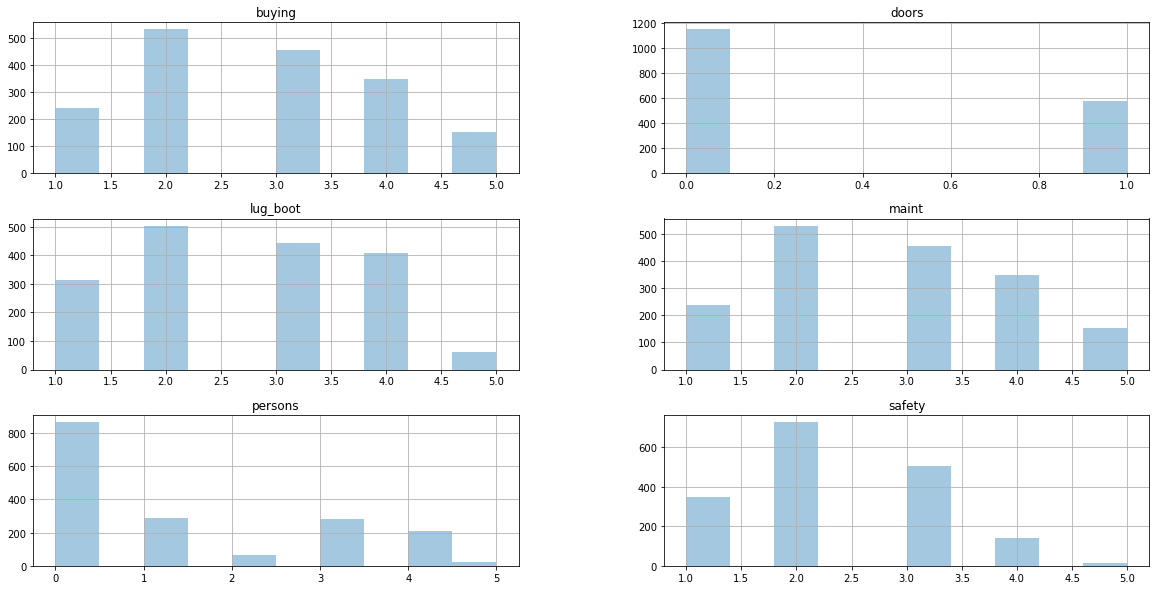

In [7]:
cars_encoder.hist(alpha=0.4, figsize=(20,10))

### create a boxplot for each feature in the dataset.

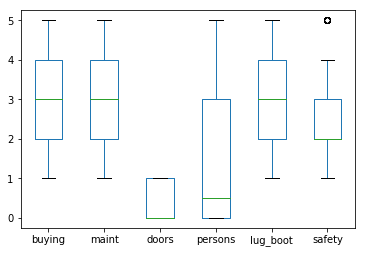

In [8]:
car_box = cars_encoder.boxplot(grid=False, return_type='axes')

## 3. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. 

In [9]:
features = cars_encoder.columns
print("* features:", features, sep="\n")

* features:
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [10]:
ley = preprocessing.LabelEncoder()
Y = cars['acceptability'].as_matrix()
Y = ley.fit_transform(Y)
X = cars_encoder[features]
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [11]:
with open("tree_image.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names=features, 
                            class_names=['unacc', 'acc', 'good', 'vgood'], 
                            filled=True, 
                            rounded=True,
                            out_file=f)

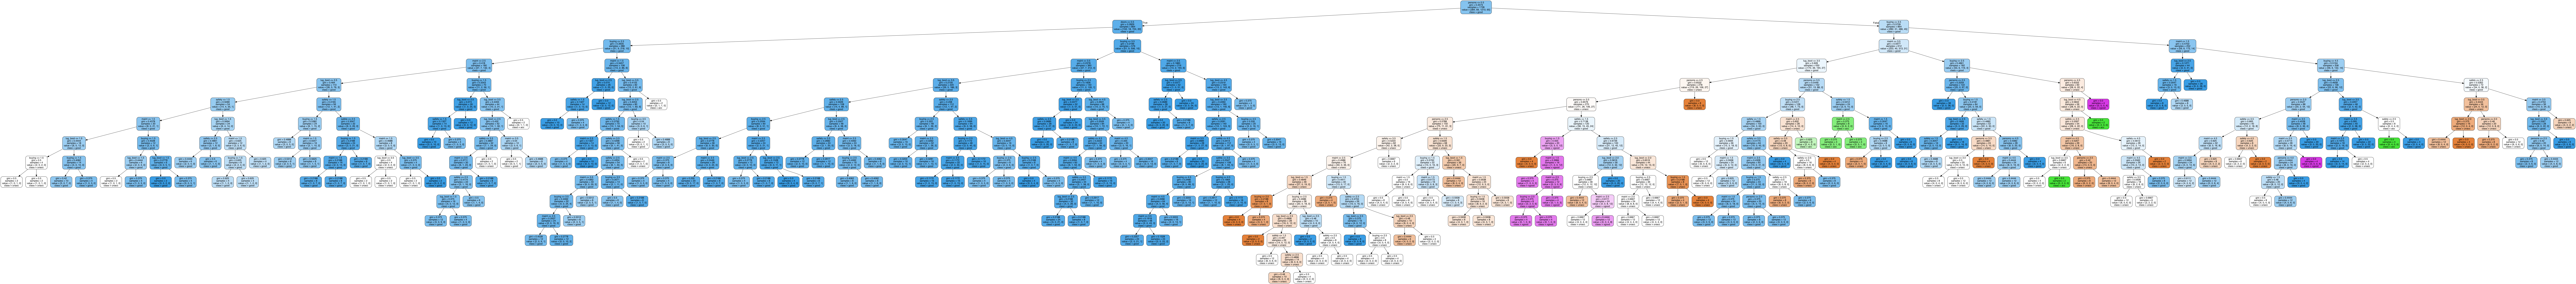

In [12]:
graph = pydotplus.graph_from_dot_data(open('tree_image.dot').read()) 
Image(graph.create_png())


## 5. Create a new instance with your choice of values for each of the features. 

In [15]:
newInstance = ["low","low","2","2","small","low"]
clf.predict(le.fit_transform(newInstance))

/Users/jialiu/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [14]:
clf = tree.DecisionTreeClassifier(max_features=4,min_samples_split=100, random_state=99)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')